In [ ]:
#installerer og laster inn pakker
install.packages(c("readr", "gdata", "readxl", "dplyr", "purrr", "ggplot2"))
library(readr)
library(gdata)
library(readxl)
library(dplyr)
library(purrr)
library(ggplot2)
library(tidyverse)

In [19]:
# laster inn filer og transformerer til en tibble, lagrer bare den nødvendige informasjonen og gir navn etter oppgaven
file_GIStemp <- read_delim("https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv", delim = ",", skip = 1)[, c("Year", "J-D")]
colnames(file_GIStemp) <- c("Year", "GISS")
file_GIStemp$Year <- as.integer(file_GIStemp$Year)

file_Berkeley <- read.table("https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Land_and_Ocean_summary.txt", skip = 57)[1:2]
colnames(file_Berkeley) <- c("Year", "BEST")

file_HadCRUT <- read.csv("https://www.metoffice.gov.uk/hadobs/hadcrut5/data/HadCRUT.5.0.2.0/analysis/diagnostics/HadCRUT.5.0.2.0.analysis.summary_series.global.annual.csv", stringsAsFactors = F)[1:2]
colnames(file_HadCRUT) <- c("Year", "HadCRUT")

file_NOAA <- read.csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/12/12/1850-2023/data.csv", skip = 4)
colnames(file_NOAA) <- c("Year", "NOAA")

Rows: 144 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): D-N, DJF
dbl (17): Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
# Setter sammen de individuelle df i en, left_joiner etter HadCRUT siden den har en mer verdi enn de andre
df_all <- list(file_HadCRUT, file_NOAA, file_GIStemp, file_Berkeley) %>% reduce (left_join, by = "Year")

In [13]:
# Omstrukturerer df'en slik at de forskjellige indexene er i samme column og deres verdier i en annen. For enklere plotting senere.
df_all_long <- df_all |>
  pivot_longer(
    cols = c("HadCRUT", "NOAA", "GISS", "BEST"),
    names_to = "Index",
    values_to = "Anomaly"
  )

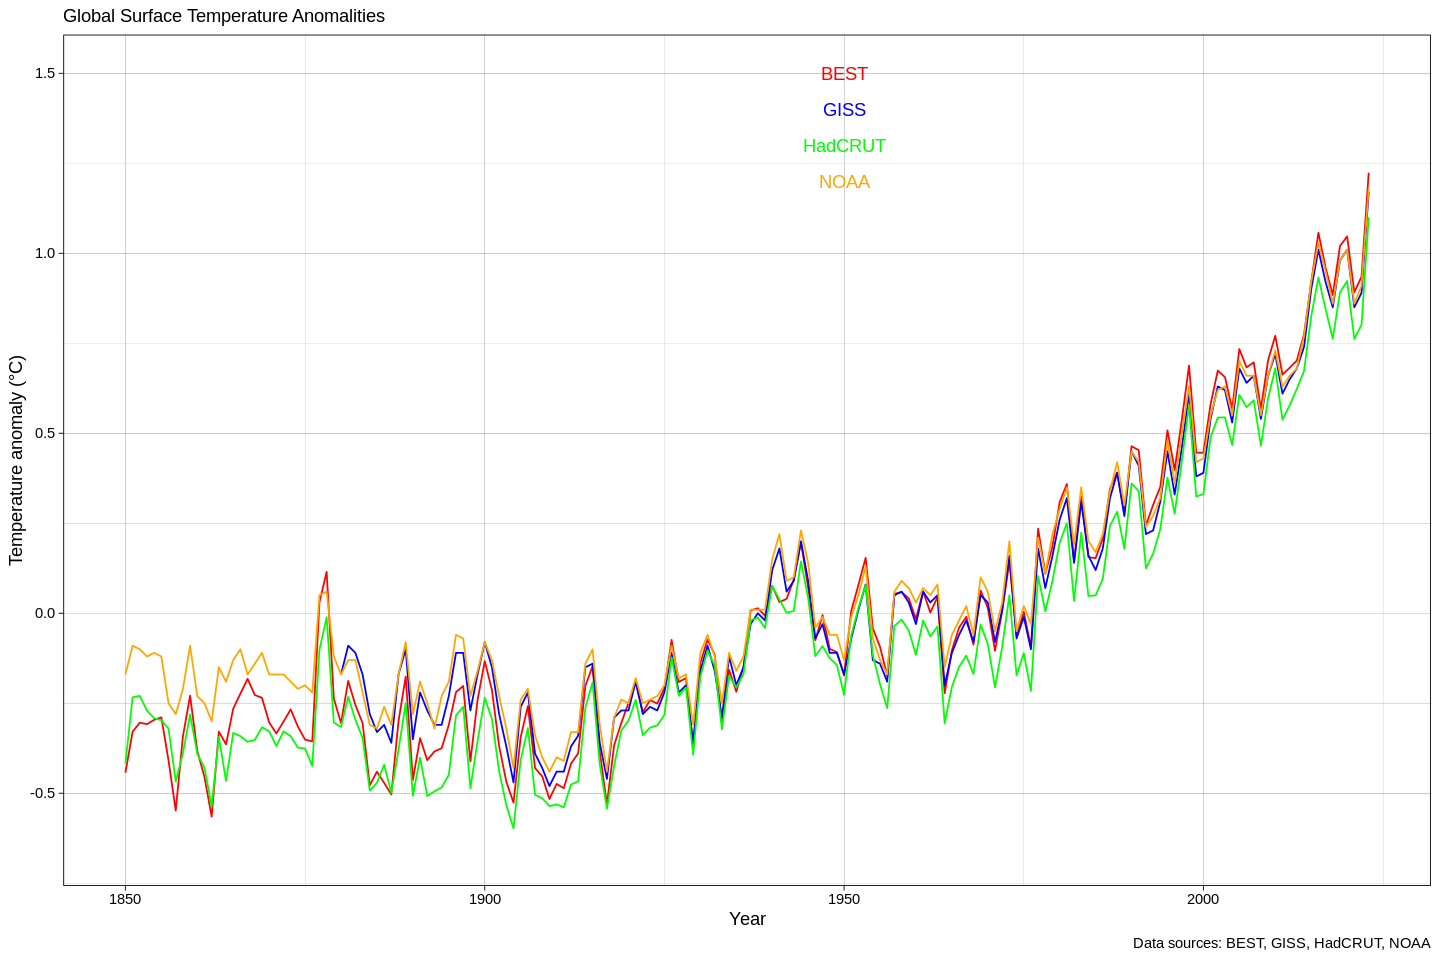

In [26]:
# Fordi jupyter defaulter til en mindre, firkantig output enn vanlig r så tvinger jeg den til å gi ut et større bilde
# Inspirasjon til kode hentet fra https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html
options(repr.plot.width=12, repr.plot.height=8)
#siden GISS starter senere enn de andre kommer det en advarsel om tomme rader, denne fjerner denne advarselen
options(warn=-1)
# Plotter grafen, lager egen liste med farger så de matcher den i oppgaven
colors <- c("red", "blue", "green", "orange")
df_all_long %>%
  ggplot(aes(x=Year , y = Anomaly, group_by = Index, color = Index)) +
  geom_line()+
  # Etter mye tulling rundt fant jeg at den beste måten å få legenden inn slik den er i oppgaven er ved å bare lage den selv, da det var lite hensiktsmessig å styre med for-loops og ulike pakker for å endre fargene
  annotate(geom="text", x=1950, y=1.5, label="BEST",
              color="red")+
  annotate(geom="text", x=1950, y=1.4, label="GISS",
              color="blue")+
  annotate(geom="text", x=1950, y=1.3, label="HadCRUT",
              color="green")+
  annotate(geom="text", x=1950, y=1.2, label="NOAA",
              color="orange")+
  labs(
    subtitle = "Global Surface Temperature Anomalities",
    caption = "Data sources: BEST, GISS, HadCRUT, NOAA",
    color = ""
  ) +
    ylab("Temperature anomaly (°C)")+
    ylim(-0.65, 1.5) +
    scale_color_manual(values = colors)+
                    theme_linedraw() +
    theme(legend.position = "", legend.text = element_blank(), legend.background = element_blank())